Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features.

In [1]:
import pymysql 
from sqlalchemy import create_engine 
import pandas as pd

In [2]:
import getpass

In [3]:
password = getpass.getpass()

········


In [28]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/Sakila'
engine = create_engine(connection_string)
query = """SELECT 
    Title AS title,
    rental_duration as rental_duration,
    MAX(rental_date) AS rental_date,
    rental_rate AS rental_rate,
    COUNT(rental_id) AS count_of_rental,
    language.name AS language
FROM
    film
        INNER JOIN
    inventory USING (film_id)
        INNER JOIN
    language USING (language_id)
        INNER JOIN
    rental USING (inventory_id)
        INNER JOIN
    payment USING (rental_id)
GROUP BY Title;

"""

In [29]:
df = pd.read_sql_query(query, engine)

In [30]:
df

,title,rental_duration,rental_date,rental_rate,count_of_rental,language
0,ACADEMY DINOSAUR,6,2005-08-23 01:01:01,0.99,23,English
1,ACE GOLDFINGER,3,2006-02-14 15:16:03,4.99,7,English
2,ADAPTATION HOLES,7,2005-08-23 13:54:39,2.99,12,English
3,AFFAIR PREJUDICE,5,2006-02-14 15:16:03,2.99,23,English
4,AFRICAN EGG,6,2006-02-14 15:16:03,2.99,12,English
...,...,...,...,...,...,...
953,YOUNG LANGUAGE,6,2005-08-23 01:50:31,0.99,7,English
954,YOUTH KICK,4,2005-08-18 17:31:36,0.99,6,English
955,ZHIVAGO CORE,6,2006-02-14 15:16:03,0.99,9,English
956,ZOOLANDER FICTION,5,2005-08-23 08:48:43,2.99,17,English


In [16]:
df.isna().sum()

title              0
rental_duration    0
rental_date        0
rental_rate        0
count_of_rental    0
Language           0
dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [18]:
corr_matrix = df.corr()

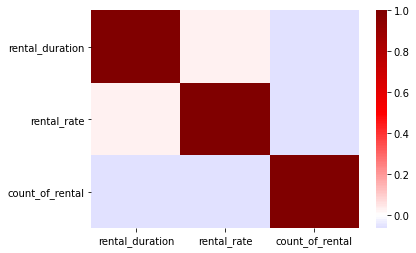

In [19]:
sns.heatmap(corr_matrix, cmap="seismic", center=0);

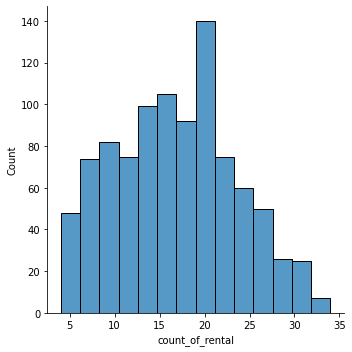

In [20]:
sns.displot(df['count_of_rental'])

In [21]:
import numpy as np 
from sklearn.preprocessing import Normalizer
x= df.select_dtypes(include=np.number)

In [22]:
x

,rental_duration,rental_rate,count_of_rental
0,6,0.99,23
1,3,4.99,7
2,7,2.99,12
3,5,2.99,23
4,6,2.99,12
...,...,...,...
953,6,0.99,7
954,4,0.99,6
955,6,0.99,9
956,5,2.99,17


In [23]:
transformer = Normalizer()
transformer.fit(x)
x_normalized = transformer.transform(x)

In [24]:
x_normalized= pd.DataFrame(x_normalized, columns=x.columns)

In [25]:
x_normalized

,rental_duration,rental_rate,count_of_rental
0,0.252203,0.041614,0.966779
1,0.329491,0.548054,0.768813
2,0.492591,0.210407,0.844442
3,0.210736,0.126020,0.969386
4,0.436505,0.217525,0.873010
...,...,...,...
953,0.647072,0.106767,0.754917
954,0.549545,0.136012,0.824318
955,0.552391,0.091145,0.828587
956,0.278233,0.166383,0.945993


In [26]:
cat= df.select_dtypes(include=np.object)

C:\Users\TWINSP~1\AppData\Local\Temp/ipykernel_23968/1787891887.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat= df.select_dtypes(include=np.object)


In [27]:
cat

,title,Language
0,ACADEMY DINOSAUR,English
1,ACE GOLDFINGER,English
2,ADAPTATION HOLES,English
3,AFFAIR PREJUDICE,English
4,AFRICAN EGG,English
...,...,...
953,YOUNG LANGUAGE,English
954,YOUTH KICK,English
955,ZHIVAGO CORE,English
956,ZOOLANDER FICTION,English
